In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Fish_dataset.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:

total_count=df['Species'].value_counts()
total_count

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [5]:
count=pd.DataFrame(total_count)
count

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


<AxesSubplot:>

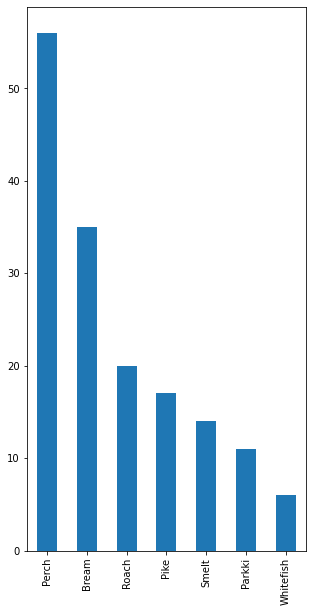

In [6]:

plt.figure(figsize=(5,10))

df['Species'].value_counts().plot(kind='bar')

### 2. Identify outliers and remove if any?

In [7]:
df=pd.read_csv("Fish_dataset.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


C:\Users\91875\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

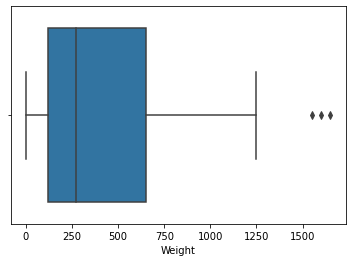

In [8]:

sns.boxplot(df.Weight)

In [9]:

df.drop(df.index[df.Weight>1250],axis=0,inplace=True)

C:\Users\91875\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

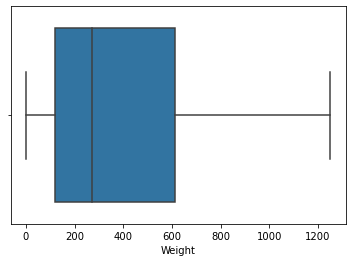

In [10]:

sns.boxplot(df.Weight)

In [11]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### 3.Build a regression model and print regression equation?


In [12]:

df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [13]:
df.Species = df.Species.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Species  156 non-null    category
 1   Weight   156 non-null    float64 
 2   Length1  156 non-null    float64 
 3   Length2  156 non-null    float64 
 4   Length3  156 non-null    float64 
 5   Height   156 non-null    float64 
 6   Width    156 non-null    float64 
dtypes: category(1), float64(6)
memory usage: 9.0 KB


In [14]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### Splitting DV and IDV

In [15]:

idv=df[['Species','Length1','Length2','Length3','Height','Width']]
idv.head()

,Species,Length1,Length2,Length3,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340


In [16]:

idv_c=idv[['Species']]
idv_c.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [17]:
idv_n=idv.iloc[:,1:]
idv_n.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [18]:
dv=df.iloc[:,1]
dv.head()


0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [19]:
both=df.iloc[:,1:]
both.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


<AxesSubplot:xlabel='Weight', ylabel='Density'>

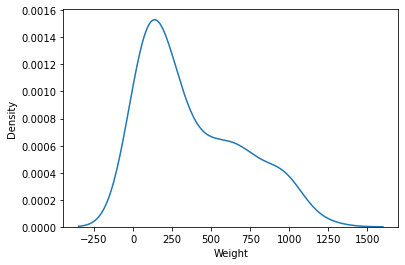

In [20]:

sns.kdeplot(dv)

In [23]:
from scipy.stats import pearsonr

In [24]:
for i in idv_n:
    r,p=pearsonr(dv,idv_n[i])
    print(i,r,p)
    if p>0.05:
        print("Not Significant.")
    else:
        print("Significant.")
        print()


Length1 0.8957425609788277 4.343723387866899e-56
Significant.

Length2 0.899759050950671 2.4714981862120374e-57
Significant.

Length3 0.9072921554536855 8.113849316457461e-60
Significant.

Height 0.8018712156822994 2.867672256971377e-36
Significant.

Width 0.9234321722602117 6.124586053795755e-66
Significant.



In [25]:

both.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.895743,0.899759,0.907292,0.801871,0.923432
Length1,0.895743,1.000000,0.999418,0.990612,0.676326,0.889166
Length2,0.899759,0.999418,1.000000,0.993049,0.691954,0.895584
Length3,0.907292,0.990612,0.993049,1.000000,0.756019,0.897053
Height,0.801871,0.676326,0.691954,0.756019,1.000000,0.800542
Width,0.923432,0.889166,0.895584,0.897053,0.800542,1.000000


<AxesSubplot:>

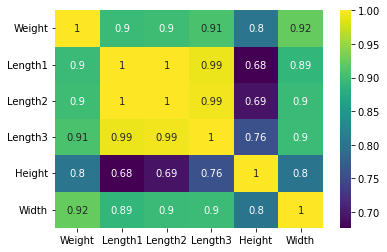

In [26]:
sns.heatmap(both.corr(),annot=True,cmap="viridis")

### Normality test using Shapiro


In [27]:
from scipy.stats import anderson,shapiro,kstest
from scipy import stats
shapiro_test = stats.shapiro(dv)
shapiro_test


ShapiroResult(statistic=0.897249698638916, pvalue=5.5507900498241725e-09)

In [28]:
s,p=shapiro(dv)
if p>0.05:
    print("normally distributed")
else:
    print("Not normally distributed")


Not normally distributed


In [29]:
for i in idv_n:
    for j in idv_n:
        r,p = pearsonr(idv_n[i],idv_n[j])
        print(f'{i} and {j} ------> {r},{p}')
        if p>0.05:
            print("Not Significant.")
        else:
            print("Significant.")
        print()

Length1 and Length1 ------> 1.0,0.0
Significant.

Length1 and Length2 ------> 0.9994183105852784,7.219809345514062e-228
Significant.

Length1 and Length3 ------> 0.9906124044862432,5.250258433863004e-135
Significant.

Length1 and Height ------> 0.676325953414473,3.3727542296509903e-22
Significant.

Length1 and Width ------> 0.8891659137401852,3.7188015446162545e-54
Significant.

Length2 and Length1 ------> 0.9994183105852784,7.219809345514062e-228
Significant.

Length2 and Length2 ------> 1.0,0.0
Significant.

Length2 and Length3 ------> 0.9930492994505424,5.123355775306784e-145
Significant.

Length2 and Height ------> 0.6919539518671971,1.4918987250177315e-23
Significant.

Length2 and Width ------> 0.8955835283148015,4.854043147867683e-56
Significant.

Length3 and Length1 ------> 0.9906124044862432,5.250258433863004e-135
Significant.

Length3 and Length2 ------> 0.9930492994505424,5.123355775306784e-145
Significant.

Length3 and Length3 ------> 1.0,0.0
Significant.

Length3 and Height

In [30]:

idv_n.corr()

,Length1,Length2,Length3,Height,Width
Length1,1.000000,0.999418,0.990612,0.676326,0.889166
Length2,0.999418,1.000000,0.993049,0.691954,0.895584
Length3,0.990612,0.993049,1.000000,0.756019,0.897053
Height,0.676326,0.691954,0.756019,1.000000,0.800542
Width,0.889166,0.895584,0.897053,0.800542,1.000000


<AxesSubplot:>

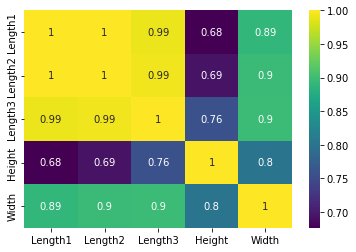

In [31]:
sns.heatmap(idv_n.corr(),annot=True,cmap="viridis")

In [32]:
from scipy.stats import anderson,shapiro,kstest
from scipy import stats
shapiro_test = stats.shapiro(idv_n)
shapiro_test

ShapiroResult(statistic=0.936906635761261, pvalue=1.1799183017322817e-17)

In [33]:
s,p=shapiro(idv_n)
if p>0.05:
    print("normally distributed")
else:
    print("Not normally distributed")

Not normally distributed


### Barplot


<AxesSubplot:>

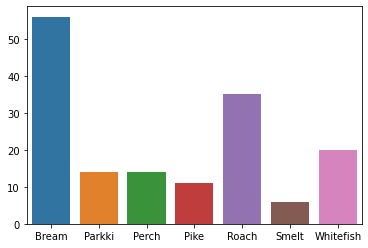

In [34]:
sns.barplot(data=idv_c,y=idv_c.value_counts(),x=idv_c.Species.unique())

In [35]:
idv_c.value_counts()

Species  
Perch        56
Bream        35
Roach        20
Pike         14
Smelt        14
Parkki       11
Whitefish     6
dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

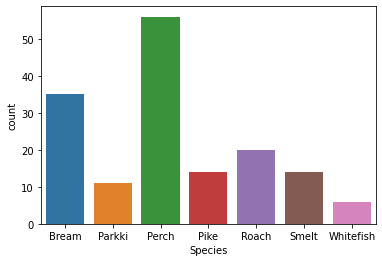

In [36]:
sns.countplot(data=idv_c,x=idv_c.Species)


In [37]:
idv_n.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [38]:
idv_n.corr()

,Length1,Length2,Length3,Height,Width
Length1,1.000000,0.999418,0.990612,0.676326,0.889166
Length2,0.999418,1.000000,0.993049,0.691954,0.895584
Length3,0.990612,0.993049,1.000000,0.756019,0.897053
Height,0.676326,0.691954,0.756019,1.000000,0.800542
Width,0.889166,0.895584,0.897053,0.800542,1.000000


<AxesSubplot:>

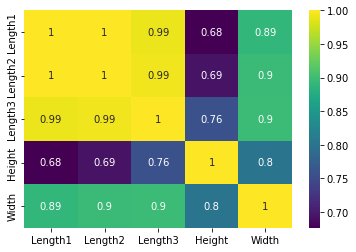

In [39]:
sns.heatmap(idv_n.corr(),annot=True,cmap="viridis")

In [40]:
for i in idv_n:
    for j in idv_n:
        r,p = pearsonr(idv_n[i],idv_n[j])
        print(f'{i} and {j} ------> {r},{p}')
        print()

Length1 and Length1 ------> 1.0,0.0

Length1 and Length2 ------> 0.9994183105852784,7.219809345514062e-228

Length1 and Length3 ------> 0.9906124044862432,5.250258433863004e-135

Length1 and Height ------> 0.676325953414473,3.3727542296509903e-22

Length1 and Width ------> 0.8891659137401852,3.7188015446162545e-54

Length2 and Length1 ------> 0.9994183105852784,7.219809345514062e-228

Length2 and Length2 ------> 1.0,0.0

Length2 and Length3 ------> 0.9930492994505424,5.123355775306784e-145

Length2 and Height ------> 0.6919539518671971,1.4918987250177315e-23

Length2 and Width ------> 0.8955835283148015,4.854043147867683e-56

Length3 and Length1 ------> 0.9906124044862432,5.250258433863004e-135

Length3 and Length2 ------> 0.9930492994505424,5.123355775306784e-145

Length3 and Length3 ------> 1.0,0.0

Length3 and Height ------> 0.7560186130201627,3.820207573886061e-30

Length3 and Width ------> 0.89705347312054,1.726677501889073e-56

Height and Length1 ------> 0.676325953414473,3.37275

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
for i in range(len(idv_n.columns)):
    print(f'{idv_n.columns[i]}------>{variance_inflation_factor(idv_n.values,i)}')

Length1------>11851.606958399318
Length2------>15437.668441672933
Length3------>3162.4841264495817
Height------>75.87834205065113
Width------>96.76421237834869


### To build Linear model

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x=idv_n

In [45]:
x

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [46]:
y=dv

In [47]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 156, dtype: float64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)  # test size=33% and train size =70%

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(104, 5)
(52, 5)
(104,)
(52,)


In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
l=LinearRegression()  #storing LR in variable 

In [52]:
l.fit(x_train,y_train) #fit x and y train and assign in l

LinearRegression()

In [53]:
l.coef_  #y=mx+c ; coeff is m value (wherein m is slope)

array([115.25343786, -57.04684832, -37.11150824,  41.9715575 ,
        46.61462418])

In [54]:
l.intercept_   #intercept is c value

-444.6964026172802

### RMSE for Train

In [55]:
train_pred=l.predict(x_train)
train_pred

array([ 215.16575256,  341.06191671,   56.14561538,  639.10707713,
        559.4210849 ,  906.97252877,  261.15579516,  417.28499397,
        908.37029924,  462.63781395,  230.46940409,  114.6707276 ,
        856.45899205,  274.3241283 ,  238.48730451,  553.17463148,
        161.71028343,  197.77100514,   57.39225773,  812.27676081,
        151.13719594, -189.75089361,   57.05246033,  748.0585899 ,
        668.51270652,  379.79895947,  546.68692244,  651.82564108,
        344.32294485,  616.91968167,  807.25533876,  207.328756  ,
        116.76424665,  710.65997395,  144.12069847,  789.68479442,
        255.05622519, -159.18696385,   68.63666892,  748.5013601 ,
        894.75392854,  436.43329521,   82.8473745 ,  765.72104623,
        339.4710328 ,   15.28693143,  828.06130586,  440.38830434,
        167.06396671,  224.61864453,  276.70510623,  851.99791846,
        352.10275617,  272.24598201,  148.50679614,  790.19316918,
         75.15272045,  376.18911402,  920.12278042,  359.95215

In [56]:
error=y_train-train_pred

In [57]:
error   #error for train data

66     -75.165753
130    -41.061917
61      -1.145615
109   -125.107077
134   -103.421085
          ...    
149    173.420674
129      0.181414
38       3.766677
16      74.817584
114     -5.404191
Name: Weight, Length: 104, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

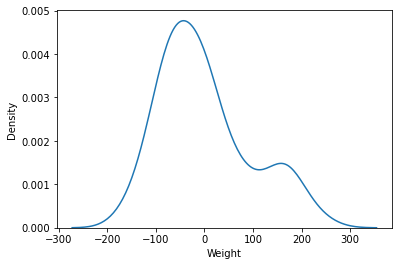

In [58]:
sns.kdeplot(error)

In [59]:
test_pred=l.predict(x_test)
test_pred

array([ 426.01356773, -184.80655152,  931.01203306,  435.76021791,
        334.12873282, -169.25641352,  -86.27823759,  565.93435857,
       -149.7697649 ,  387.68390161, -100.44091577,  674.68486694,
        912.42096164,  590.14982333,  641.98551858,  817.53302578,
        129.95122965,  273.72013321,  495.71366951,  653.24145348,
       -231.79309678,  606.40177592,  656.82223475,  566.61057599,
        578.80917882,  221.56288293,  693.28522373,  454.98336133,
        158.48562732, -210.88920857,  399.39086163,  201.87486826,
        476.39246527,  655.35323387,  701.51306006,  151.23459781,
        142.36952931,  134.25738245,  412.5531731 ,  721.01699715,
        535.87847576,  168.80842913,  831.77734665,   19.27945354,
        -83.70763811,  123.8955738 ,  430.86427082,  269.86300325,
        788.38880917,  735.90998099,  567.83465779,  124.80622414])

In [60]:
error2=y_test-test_pred

In [61]:
error2

102   -126.013568
146    192.306552
127     68.987967
107   -135.760218
69    -134.128733
150    177.956414
157    105.978238
13    -225.934359
156    161.969765
1      -97.683902
158    120.340916
25      50.315133
141    337.579038
136    -50.149823
22     -21.985519
116     82.466974
41     -19.951230
56      -3.720133
54    -105.713670
139    116.758547
72     237.693097
14      -6.401776
138    -89.822235
58     -26.610576
11     -78.809179
47     -61.562883
59     106.714776
4      -24.983361
91     -28.485627
145    217.589209
70    -126.390862
95     -31.874868
7      -86.392465
19      -5.353234
21     -16.513060
90     -41.234598
94       7.630471
87     -14.257382
131   -112.553173
112    -36.016997
8      -85.878476
45      -8.808429
121    183.222653
36      49.720546
35     123.707638
42      -3.895574
3      -67.864271
128    -69.863003
119     61.611191
28     114.090019
137    -67.834658
63     -34.806224
Name: Weight, dtype: float64

In [62]:
from sklearn.metrics import mean_squared_error,r2_score

In [63]:
mean_squared_error(train_pred,y_train)

8597.388729384915

In [64]:
np.sqrt(mean_squared_error(train_pred,y_train))     

92.72210485846897

In [65]:
r2_score(y_train,train_pred)   

0.9166435828618875

In [66]:
import statsmodels.api as sm

In [67]:
x_train1=sm.add_constant(x_train)
x_train1

,const,Length1,Length2,Length3,Height,Width
66,1.0,19.0,20.7,23.2,8.5376,3.2944
130,1.0,32.7,35.0,38.8,5.9364,4.3844
61,1.0,13.5,14.7,16.5,6.8475,2.3265
109,1.0,30.5,32.8,34.0,10.0300,6.0180
134,1.0,40.0,42.5,45.5,7.2800,4.3225
...,...,...,...,...,...,...
149,1.0,10.7,11.2,12.4,2.0832,1.2772
129,1.0,31.7,34.0,37.8,5.7078,4.1580
38,1.0,18.2,19.8,22.2,5.6166,3.1746
16,1.0,30.4,33.0,38.3,14.8604,5.2854


In [68]:
model=sm.OLS(y_train,x_train1).fit()


In [69]:

residuals=model.resid
residuals

66     -75.165753
130    -41.061917
61      -1.145615
109   -125.107077
134   -103.421085
          ...    
149    173.420674
129      0.181414
38       3.766677
16      74.817584
114     -5.404191
Length: 104, dtype: float64

<AxesSubplot:>

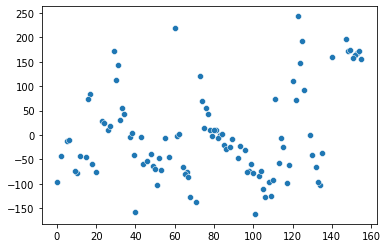

In [70]:
sns.scatterplot(data=model.resid)

<AxesSubplot:>

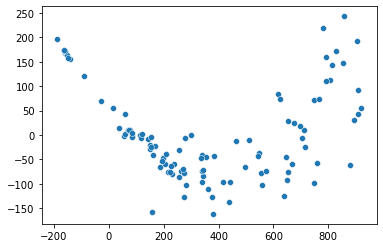

In [71]:
sns.scatterplot(x=train_pred,y=residuals)

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     215.5
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           3.15e-51
Time:                        16:40:45   Log-Likelihood:                -618.65
No. Observations:                 104   AIC:                             1249.
Df Residuals:                      98   BIC:                             1265.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -444.6964     30.627    -14.520      0.000    -505.475    -383.917
Length1      115.2534     37.255      3.094      0.003      41.322     189.185
Length2      -57.0468     38.019     -1.500      0.137    -132.494      18.400
Length3      -37.1115     15.813     -2.347      0.021     -68.492      -5.731
Height        41.9716      8.208      5.114      0.000      25.684      58.259
Width         46.6146     20.839      2.237      0.028       5.260      87.969
==============================================================================
Omnibus:                        9.230   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               10.032
Skew:                           0.751   Prob(JB):                      0.00663
Kurtosis:                       2.759   Cond. No.                         291.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
x_train2=x_train1.drop(labels='Length2',axis=1)
sm.OLS(y_train,sm.add_constant(x_train2)).fit().summary()
#we are using this code to see if the accuracy is increased by drop the column with highest p value.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     265.5
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           5.50e-52
Time:                        16:40:46   Log-Likelihood:                -619.83
No. Observations:                 104   AIC:                             1250.
Df Residuals:                      99   BIC:                             1263.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -453.4092     30.261    -14.983      0.000    -513.454    -393.364
Length1       65.3643     16.913      3.865      0.000      31.806      98.922
Length3      -45.4055     14.909     -3.046      0.003     -74.988     -15.823
Height        42.2559      8.257      5.117      0.000      25.872      58.640
Width         36.2094     19.775      1.831      0.070      -3.029      75.448
==============================================================================
Omnibus:                       11.535   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.926
Skew:                           0.863   Prob(JB):                      0.00156
Kurtosis:                       2.929   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4. What is the mean score of the model at 95% confidence interval?

In [74]:
l.score(x,y)

0.9020048229771828

### 5.Compare real and predicted weights and give a conclusion statement based on it?

In [75]:
d=pd.DataFrame({'Actual':y_test,'Predicted': test_pred,'Errors':error2})
d

,Actual,Predicted,Errors
102,300.0,426.013568,-126.013568
146,7.5,-184.806552,192.306552
127,1000.0,931.012033,68.987967
107,300.0,435.760218,-135.760218
69,200.0,334.128733,-134.128733
150,8.7,-169.256414,177.956414
157,19.7,-86.278238,105.978238
13,340.0,565.934359,-225.934359
156,12.2,-149.769765,161.969765
1,290.0,387.683902,-97.683902


#### dec 7 extra point in reguralisation

In [76]:
from sklearn.linear_model import Ridge,Lasso

In [77]:
d=Lasso(max_iter=5000)
d.fit(x_train,y_train)

Lasso(max_iter=5000)

In [78]:
d.coef_

array([ 82.26108141, -25.14201876, -36.93628705,  39.96055324,
        42.04887442])

In [79]:
d.intercept_

-451.7881735799368

In [80]:
g=Ridge()
g.fit(x_train,y_train)

Ridge()

In [81]:
g.coef_

array([ 94.78644822, -37.55690648, -36.80718128,  40.60914766,
        44.55479497])

In [82]:
g=Ridge(alpha=0.1)
g.fit(x_train,y_train)

Ridge(alpha=0.1)

In [83]:
g.coef_

array([112.69644658, -54.57570143, -37.10971409,  41.81486406,
        46.34998381])

In [84]:
g=Ridge(alpha=0.02)
g.fit(x_train,y_train)

Ridge(alpha=0.02)

In [85]:
g.coef_

array([114.73036744, -56.54063857, -37.1118381 ,  41.93976592,
        46.56032198])

In [86]:
g.intercept_

-444.80522430504425

In [87]:
train_pred=d.predict(x_train)
train_pred

array([ 213.5037565 ,  346.63150757,   51.15660797,  630.53730959,
        562.18731193,  897.88996744,  265.32547427,  418.58665441,
        908.38502721,  475.15274354,  225.42226074,  127.66674652,
        853.38237362,  280.85817737,  245.06763449,  552.50560919,
        154.12787878,  206.19488248,   52.29066105,  821.40348586,
        161.88724734, -198.56083239,   67.4678307 ,  738.48437265,
        662.65477362,  364.9471083 ,  549.74493156,  647.90613393,
        347.46623032,  612.6947998 ,  816.429014  ,  212.22479489,
        129.08271846,  710.88674585,  155.29682879,  788.93929567,
        260.65212162, -166.89708876,   82.57663726,  748.36979435,
        892.98492423,  429.93947152,   92.75823449,  750.88603876,
        342.84679037,   25.94415004,  835.39845668,  450.07133789,
        176.96481879,  212.46060078,  289.3016409 ,  854.41524374,
        360.11109086,  268.08774904,  159.74681606,  802.57817622,
         86.50011625,  378.15985873,  926.97519053,  361.80737

In [88]:
error=y_train-train_pred

In [89]:
error

66     -73.503757
130    -46.631508
61       3.843392
109   -116.537310
134   -106.187312
          ...    
149    184.044525
129     -7.793884
38       1.503236
16      79.322786
114      2.933296
Name: Weight, Length: 104, dtype: float64

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
s=Lasso(max_iter=10000)

In [92]:
c=cross_val_score(s,x_train,y_train)
c#out put is accuracy value

array([0.91644085, 0.90973047, 0.91288799, 0.90015545, 0.85450879])

In [93]:
c=cross_val_score(l,x_train,y_train)
c

array([0.91786994, 0.90731281, 0.91141308, 0.90700058, 0.8577331 ])

<AxesSubplot:>

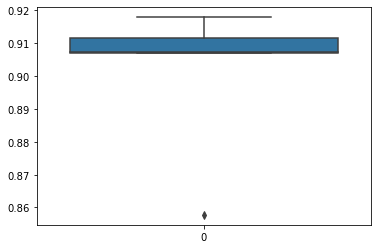

In [94]:
sns.boxplot(data=c)